# PRUEBAS DE LOS MODELOS

## 4 TRY - Random Forest

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../df_cleaned.csv')

In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
df.drop('index', axis=1, inplace=True)

In [5]:
df.replace({'<NA>':np.nan}, inplace=True)

In [6]:
# Definir columnas numéricas y categóricas
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'label']

# Convertir '<NA>' a NaN
df.replace('<NA>', np.nan, inplace=True)

# Convertir 0.0 a NaN en la columna "chol"
df['chol'] = df['chol'].replace(0.0, np.nan)

# Reemplazar los valores 0.0 y los valores negativos por NaN en la columna 'oldpeak'
df['oldpeak'] = np.where((df['oldpeak'] <= 0), np.nan, df['oldpeak'])

# Convertir columnas numéricas a tipo float
df[numeric_cols] = df[numeric_cols].astype(float)

# Convertir columnas categóricas a tipo categórico
df[categorical_cols] = df[categorical_cols].astype('category')

# Imputación para variables numéricas (usando la media)
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Imputación para variables categóricas (usando la moda)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Verificar que ya no hay valores faltantes
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64


In [7]:
# Variables tratadas con one-hot encoding
categorical_variables = ['cp', 'restecg', 'slope', 'thal', 'ca']

# Aplicar one-hot encoding a las variables categóricas
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

# Mostrar el DataFrame con las variables codificadas
print(df.head())

    age  sex  trestbps        chol  fbs  thalach  exang   oldpeak  label  \
0  51.0  1.0     125.0  213.000000  0.0    125.0    1.0  1.400000    0.0   
1  54.0  1.0     120.0  237.000000  0.0    150.0    1.0  1.500000    2.0   
2  63.0  1.0     140.0  246.774825  0.0    149.0    0.0  2.000000    2.0   
3  52.0  0.0     140.0  246.774825  0.0    140.0    0.0  1.608245    0.0   
4  55.0  1.0     140.0  217.000000  0.0    111.0    1.0  5.600000    3.0   

   cp_2.0  ...  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  slope_3.0  \
0   False  ...   False        False         True      False      False   
1   False  ...   False        False        False       True      False   
2   False  ...    True        False         True      False      False   
3    True  ...   False        False        False       True      False   
4   False  ...    True        False        False      False       True   

   thal_6.0  thal_7.0  ca_1.0  ca_2.0  ca_3.0  
0     False     False    True   False   False  
1 

In [8]:
# Selecciona solo las características numéricas
numeric_data = df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']]

# Inicializa el escalador Min-Max
scaler = MinMaxScaler()

# Escala las características numéricas
scaled_numeric_data = scaler.fit_transform(numeric_data) 

# Crea un nuevo DataFrame con las características escaladas
scaled_data = pd.DataFrame(scaled_numeric_data, columns=['trestbps', 'chol', 'thalach', 'oldpeak', 'age'])

# Reemplaza las características originales con las características escaladas en tu DataFrame
df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']] = scaled_data

In [9]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,label,cp_2.0,...,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0
0,0.469388,1.0,0.625,0.247104,0.0,0.457746,1.0,0.213115,0.0,False,...,False,False,True,False,False,False,False,True,False,False
1,0.530612,1.0,0.600,0.293436,0.0,0.633803,1.0,0.229508,2.0,False,...,False,False,False,True,False,False,True,False,False,False
2,0.714286,1.0,0.700,0.312307,0.0,0.626761,0.0,0.311475,2.0,False,...,True,False,True,False,False,False,False,False,False,False
3,0.489796,0.0,0.700,0.312307,0.0,0.563380,0.0,0.247253,0.0,True,...,False,False,False,True,False,False,False,False,False,False
4,0.551020,1.0,0.700,0.254826,0.0,0.359155,1.0,0.901639,3.0,False,...,True,False,False,False,True,False,True,False,False,False


In [10]:
# Separación de train y test
train_end = df[0:732]
test_end = df[(916-184):]

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Identificar la variable objetivo y las características para el entrenamiento
target_column = 'label'  # Nombre real de la variable objetivo
features_train = train_end.drop(columns=[target_column])
target_train = train_end[target_column]

# Identificar las características para la predicción en el conjunto de prueba
features_test = test_end.drop(columns=[target_column])

# Inicializar y entrenar el modelo de Random Forest para clasificación
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(features_train, target_train)

# Predecir las clases de las variables categóricas faltantes en el conjunto de prueba
predicted_classes = model.predict(features_test)

# Crear un nuevo DataFrame con las clases predichas
predicted_df = test_end.copy()
predicted_df[target_column] = predicted_classes

# Imprimir el DataFrame con las clases predichas
print(predicted_df)


          age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  label  \
732  0.591837  1.0  0.780000  0.169884  0.0  0.415493    1.0  0.475410    2.0   
733  0.489796  1.0  0.800000  0.214286  0.0  0.739437    0.0  0.247253    0.0   
734  0.408163  1.0  0.500000  0.312307  0.0  0.281690    0.0  0.247253    0.0   
735  0.693878  1.0  0.575000  0.312307  0.0  0.478873    1.0  0.393443    3.0   
736  0.469388  1.0  0.550000  0.173745  0.0  0.443662    0.0  0.081967    0.0   
..        ...  ...       ...       ...  ...       ...    ...       ...    ...   
911  0.530612  1.0  1.000000  0.218147  0.0  0.577465    1.0  0.311475    2.0   
912  0.551020  1.0  0.550000  0.249035  1.0  0.845070    0.0  0.247253    0.0   
913  0.795918  1.0  0.760000  0.245174  0.0  0.633803    0.0  0.114754    0.0   
914  0.632653  1.0  0.850000  0.391892  0.0  0.697183    0.0  0.016393    0.0   
915  0.612245  1.0  0.660712  0.227799  1.0  0.546008    0.0  0.247253    1.0   

     cp_2.0  ...  cp_4.0  r

In [12]:
predicted_df['index'] = predicted_df.index

In [13]:
predicted_df.reset_index(inplace=True)

In [18]:
predicted_df.drop(columns=['index'], inplace=True)

# Renombrar la columna 'level_0' a 'index'
predicted_df.rename(columns={'level_0': 'index'}, inplace=True)

predicted_df['ID'] = range(len(predicted_df))
# Guardar las columnas 'index' y 'label' en un archivo CSV
predicted_df[['ID', 'label']].to_csv('try4_data.csv', index=False)

In [19]:
predicted_df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,label,cp_2.0,...,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0,ID
0,0.591837,1.0,0.780000,0.169884,0.0,0.415493,1.0,0.475410,2.0,False,...,False,True,False,True,False,False,False,False,False,0
1,0.489796,1.0,0.800000,0.214286,0.0,0.739437,0.0,0.247253,0.0,True,...,False,False,True,False,False,False,False,False,False,1
2,0.408163,1.0,0.500000,0.312307,0.0,0.281690,0.0,0.247253,0.0,True,...,False,False,True,False,False,False,False,False,False,2
3,0.693878,1.0,0.575000,0.312307,0.0,0.478873,1.0,0.393443,3.0,False,...,False,False,False,True,False,False,False,False,False,3
4,0.469388,1.0,0.550000,0.173745,0.0,0.443662,0.0,0.081967,0.0,False,...,False,False,False,False,False,False,False,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.530612,1.0,1.000000,0.218147,0.0,0.577465,1.0,0.311475,2.0,False,...,False,False,True,False,False,False,False,False,False,179
180,0.551020,1.0,0.550000,0.249035,1.0,0.845070,0.0,0.247253,0.0,True,...,True,False,True,False,False,False,False,False,False,180
181,0.795918,1.0,0.760000,0.245174,0.0,0.633803,0.0,0.114754,0.0,False,...,False,True,True,False,False,True,False,False,False,181
182,0.632653,1.0,0.850000,0.391892,0.0,0.697183,0.0,0.016393,0.0,False,...,False,True,True,False,False,True,False,False,False,182


In [20]:
try4_df = pd.read_csv('try4_data.csv')

In [21]:
try4_df['label'].value_counts()

label
0.0    98
1.0    37
2.0    27
3.0    22
Name: count, dtype: int64

## 5 TRY - SVM

In [22]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [23]:
df = pd.read_csv('../df_cleaned.csv')

In [24]:
df.drop(columns='Unnamed: 0', inplace=True)

In [25]:
df.drop('index', axis=1, inplace=True)

In [26]:
df.replace({'<NA>':np.nan}, inplace=True)

In [27]:
# Definir columnas numéricas y categóricas
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'label']

# Convertir '<NA>' a NaN
df.replace('<NA>', np.nan, inplace=True)

# Convertir 0.0 a NaN en la columna "chol"
df['chol'] = df['chol'].replace(0.0, np.nan)

# Reemplazar los valores 0.0 y los valores negativos por NaN en la columna 'oldpeak'
df['oldpeak'] = np.where((df['oldpeak'] <= 0), np.nan, df['oldpeak'])

# Convertir columnas numéricas a tipo float
df[numeric_cols] = df[numeric_cols].astype(float)

# Convertir columnas categóricas a tipo categórico
df[categorical_cols] = df[categorical_cols].astype('category')

# Imputación para variables numéricas (usando la media)
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Imputación para variables categóricas (usando la moda)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Verificar que ya no hay valores faltantes
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64


In [28]:
# Variables tratadas con one-hot encoding
categorical_variables = ['cp', 'restecg', 'slope', 'thal', 'ca']

# Aplicar one-hot encoding a las variables categóricas
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

# Mostrar el DataFrame con las variables codificadas
print(df.head())

    age  sex  trestbps        chol  fbs  thalach  exang   oldpeak  label  \
0  51.0  1.0     125.0  213.000000  0.0    125.0    1.0  1.400000    0.0   
1  54.0  1.0     120.0  237.000000  0.0    150.0    1.0  1.500000    2.0   
2  63.0  1.0     140.0  246.774825  0.0    149.0    0.0  2.000000    2.0   
3  52.0  0.0     140.0  246.774825  0.0    140.0    0.0  1.608245    0.0   
4  55.0  1.0     140.0  217.000000  0.0    111.0    1.0  5.600000    3.0   

   cp_2.0  ...  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  slope_3.0  \
0   False  ...   False        False         True      False      False   
1   False  ...   False        False        False       True      False   
2   False  ...    True        False         True      False      False   
3    True  ...   False        False        False       True      False   
4   False  ...    True        False        False      False       True   

   thal_6.0  thal_7.0  ca_1.0  ca_2.0  ca_3.0  
0     False     False    True   False   False  
1 

In [29]:
# Selecciona solo las características numéricas
numeric_data = df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']]

# Inicializa el escalador Min-Max
scaler = MinMaxScaler()

# Escala las características numéricas
scaled_numeric_data = scaler.fit_transform(numeric_data) 

# Crea un nuevo DataFrame con las características escaladas
scaled_data = pd.DataFrame(scaled_numeric_data, columns=['trestbps', 'chol', 'thalach', 'oldpeak', 'age'])

# Reemplaza las características originales con las características escaladas en tu DataFrame
df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']] = scaled_data

In [30]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,label,cp_2.0,...,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0
0,0.469388,1.0,0.625,0.247104,0.0,0.457746,1.0,0.213115,0.0,False,...,False,False,True,False,False,False,False,True,False,False
1,0.530612,1.0,0.600,0.293436,0.0,0.633803,1.0,0.229508,2.0,False,...,False,False,False,True,False,False,True,False,False,False
2,0.714286,1.0,0.700,0.312307,0.0,0.626761,0.0,0.311475,2.0,False,...,True,False,True,False,False,False,False,False,False,False
3,0.489796,0.0,0.700,0.312307,0.0,0.563380,0.0,0.247253,0.0,True,...,False,False,False,True,False,False,False,False,False,False
4,0.551020,1.0,0.700,0.254826,0.0,0.359155,1.0,0.901639,3.0,False,...,True,False,False,False,True,False,True,False,False,False


In [31]:
# Separación de train y test
train_end = df[0:732]
test_end = df[(916-184):]

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Crear un modelo de clasificador SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0, random_state=42))

# Entrenar el modelo SVM
svm_model.fit(features_train, target_train)

# Predecir las clases en el conjunto de prueba
predicted_classes_svm = svm_model.predict(features_test)

# Crear un nuevo DataFrame con las clases predichas por SVM
predicted_df_svm = test_end.copy()
predicted_df_svm[target_column] = predicted_classes_svm

# Imprimir el DataFrame con las clases predichas por SVM
print(predicted_df_svm)


          age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  label  \
732  0.591837  1.0  0.780000  0.169884  0.0  0.415493    1.0  0.475410    2.0   
733  0.489796  1.0  0.800000  0.214286  0.0  0.739437    0.0  0.247253    0.0   
734  0.408163  1.0  0.500000  0.312307  0.0  0.281690    0.0  0.247253    0.0   
735  0.693878  1.0  0.575000  0.312307  0.0  0.478873    1.0  0.393443    2.0   
736  0.469388  1.0  0.550000  0.173745  0.0  0.443662    0.0  0.081967    0.0   
..        ...  ...       ...       ...  ...       ...    ...       ...    ...   
911  0.530612  1.0  1.000000  0.218147  0.0  0.577465    1.0  0.311475    0.0   
912  0.551020  1.0  0.550000  0.249035  1.0  0.845070    0.0  0.247253    0.0   
913  0.795918  1.0  0.760000  0.245174  0.0  0.633803    0.0  0.114754    0.0   
914  0.632653  1.0  0.850000  0.391892  0.0  0.697183    0.0  0.016393    0.0   
915  0.612245  1.0  0.660712  0.227799  1.0  0.546008    0.0  0.247253    1.0   

     cp_2.0  ...  cp_4.0  r

In [33]:
predicted_df_svm['index'] = predicted_df.index
predicted_df_svm.reset_index(inplace=True)

In [34]:
predicted_df_svm.drop(columns=['index'], inplace=True)

# Renombrar la columna 'level_0' a 'index'
predicted_df_svm.rename(columns={'level_0': 'index'}, inplace=True)

predicted_df_svm['ID'] = range(len(predicted_df_svm))
# Guardar las columnas 'index' y 'label' en un archivo CSV
predicted_df_svm[['ID', 'label']].to_csv('try5_data.csv', index=False)

In [35]:
try5_df = pd.read_csv('try5_data.csv')

In [37]:
try5_df['label'].value_counts()

label
0.0    99
1.0    41
2.0    22
3.0    22
Name: count, dtype: int64

## 10 TRY - Random Forest

In [158]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [159]:
df = pd.read_csv('../df_cleaned.csv')

In [160]:
df.drop(columns='Unnamed: 0', inplace=True)

In [161]:
df.drop('index', axis=1, inplace=True)

In [162]:
df.replace({'<NA>':np.nan}, inplace=True)

In [163]:
# Definir columnas numéricas y categóricas
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'label']

# Convertir '<NA>' a NaN
df.replace('<NA>', np.nan, inplace=True)

# Convertir columnas numéricas a tipo float
df[numeric_cols] = df[numeric_cols].astype(float)

# Convertir columnas categóricas a tipo categórico
df[categorical_cols] = df[categorical_cols].astype('category')

# Imputación para variables numéricas (usando la media)
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Imputación para variables categóricas (usando la moda)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Verificar que ya no hay valores faltantes
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64


In [164]:
# Variables tratadas con one-hot encoding
categorical_variables = ['cp', 'restecg', 'slope', 'thal', 'ca']

# Aplicar one-hot encoding a las variables categóricas
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

# Mostrar el DataFrame con las variables codificadas
print(df.head())

    age  sex  trestbps        chol  fbs  thalach  exang  oldpeak  label  \
0  51.0  1.0     125.0  213.000000  0.0    125.0    1.0      1.4    0.0   
1  54.0  1.0     120.0  237.000000  0.0    150.0    1.0      1.5    2.0   
2  63.0  1.0     140.0    0.000000  0.0    149.0    0.0      2.0    2.0   
3  52.0  0.0     140.0  199.146727  0.0    140.0    0.0      0.0    0.0   
4  55.0  1.0     140.0  217.000000  0.0    111.0    1.0      5.6    3.0   

   cp_2.0  ...  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  slope_3.0  \
0   False  ...   False        False         True      False      False   
1   False  ...   False        False        False       True      False   
2   False  ...    True        False         True      False      False   
3    True  ...   False        False        False       True      False   
4   False  ...    True        False        False      False       True   

   thal_6.0  thal_7.0  ca_1.0  ca_2.0  ca_3.0  
0     False     False    True   False   False  
1     Fa

In [165]:
# Selecciona solo las características numéricas
numeric_data = df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']]

# Inicializa el escalador Min-Max
scaler = MinMaxScaler()

# Escala las características numéricas
scaled_numeric_data = scaler.fit_transform(numeric_data) 

# Crea un nuevo DataFrame con las características escaladas
scaled_data = pd.DataFrame(scaled_numeric_data, columns=['trestbps', 'chol', 'thalach', 'oldpeak', 'age'])

# Reemplaza las características originales con las características escaladas en tu DataFrame
df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']] = scaled_data

In [166]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,label,cp_2.0,...,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0
0,0.469388,1.0,0.625,0.353234,0.0,0.457746,1.0,0.454545,0.0,False,...,False,False,True,False,False,False,False,True,False,False
1,0.530612,1.0,0.600,0.393035,0.0,0.633803,1.0,0.465909,2.0,False,...,False,False,False,True,False,False,True,False,False,False
2,0.714286,1.0,0.700,0.000000,0.0,0.626761,0.0,0.522727,2.0,False,...,True,False,True,False,False,False,False,False,False,False
3,0.489796,0.0,0.700,0.330260,0.0,0.563380,0.0,0.295455,0.0,True,...,False,False,False,True,False,False,False,False,False,False
4,0.551020,1.0,0.700,0.359867,0.0,0.359155,1.0,0.931818,3.0,False,...,True,False,False,False,True,False,True,False,False,False


In [167]:
# Separación de train y test
train_end = df[0:732]
test_end = df[(916-184):]

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Identificar la variable objetivo y las características para el entrenamiento
target_column = 'label'  # Nombre real de la variable objetivo
features_train = train_end.drop(columns=[target_column])
target_train = train_end[target_column]

# Identificar las características para la predicción en el conjunto de prueba
features_test = test_end.drop(columns=[target_column])

# Inicializar y entrenar el modelo de Random Forest para clasificación
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(features_train, target_train)

# Predecir las clases de las variables categóricas faltantes en el conjunto de prueba
predicted_classes = model.predict(features_test)

# Crear un nuevo DataFrame con las clases predichas
predicted_df = test_end.copy()
predicted_df[target_column] = predicted_classes

# Imprimir el DataFrame con las clases predichas
print(predicted_df)

          age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  label  \
732  0.591837  1.0  0.780000  0.286899  0.0  0.415493    1.0  0.636364    2.0   
733  0.489796  1.0  0.800000  0.325041  0.0  0.739437    0.0  0.295455    0.0   
734  0.408163  1.0  0.500000  0.330260  0.0  0.281690    0.0  0.295455    0.0   
735  0.693878  1.0  0.575000  0.000000  0.0  0.478873    1.0  0.579545    1.0   
736  0.469388  1.0  0.550000  0.290216  0.0  0.443662    0.0  0.363636    0.0   
..        ...  ...       ...       ...  ...       ...    ...       ...    ...   
911  0.530612  1.0  1.000000  0.328358  0.0  0.577465    1.0  0.522727    2.0   
912  0.551020  1.0  0.550000  0.354892  1.0  0.845070    0.0  0.394986    0.0   
913  0.795918  1.0  0.760000  0.351575  0.0  0.633803    0.0  0.386364    0.0   
914  0.632653  1.0  0.850000  0.477612  0.0  0.697183    0.0  0.318182    0.0   
915  0.612245  1.0  0.660712  0.336650  1.0  0.546008    0.0  0.394986    1.0   

     cp_2.0  ...  cp_4.0  r

In [169]:
predicted_df['index'] = predicted_df.index

In [170]:
predicted_df.reset_index(inplace=True)

In [171]:
predicted_df.drop(columns=['index'], inplace=True)

# Renombrar la columna 'level_0' a 'index'
predicted_df.rename(columns={'level_0': 'index'}, inplace=True)

predicted_df['ID'] = range(len(predicted_df))
# Guardar las columnas 'index' y 'label' en un archivo CSV
predicted_df[['ID', 'label']].to_csv('try10_data.csv', index=False)

In [172]:
try10_df = pd.read_csv('try10_data.csv')

In [173]:
try10_df['label'].value_counts()

label
0.0    98
1.0    39
3.0    24
2.0    22
4.0     1
Name: count, dtype: int64

## 16 TRY - Random Forest

In [65]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [66]:
df = pd.read_csv('../df_cleaned.csv')

In [67]:
df.drop(columns='Unnamed: 0', inplace=True)

In [68]:
df.drop('index', axis=1, inplace=True)

In [69]:
df.replace({'<NA>':np.nan}, inplace=True)

In [70]:
# Convertir '<NA>' a NaN
df.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols_mean = ['trestbps', 'thalach', 'chol']
numeric_cols_median = ['oldpeak', 'age']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'label', 'ca']

# Imputación para variables numéricas con la media
numeric_imputer_mean = SimpleImputer(strategy='mean')
df[numeric_cols_mean] = numeric_imputer_mean.fit_transform(df[numeric_cols_mean])

# Imputación para variables numéricas con la mediana
numeric_imputer_median = SimpleImputer(strategy='median')
df[numeric_cols_median] = numeric_imputer_median.fit_transform(df[numeric_cols_median])

# Imputación para variables categóricas (usando la moda)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Verificar que ya no hay valores faltantes
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64


In [71]:
# Variables tratadas con one-hot encoding
categorical_variables = ['cp', 'restecg', 'slope', 'thal', 'ca']

# Aplicar one-hot encoding a las variables categóricas
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

# Mostrar el DataFrame con las variables codificadas
print(df.head())

    age  sex  trestbps        chol  fbs  thalach  exang  oldpeak  label  \
0  51.0  1.0     125.0  213.000000  0.0    125.0    1.0      1.4    0.0   
1  54.0  1.0     120.0  237.000000  0.0    150.0    1.0      1.5    2.0   
2  63.0  1.0     140.0    0.000000  0.0    149.0    0.0      2.0    2.0   
3  52.0  0.0     140.0  199.146727  0.0    140.0    0.0      0.0    0.0   
4  55.0  1.0     140.0  217.000000  0.0    111.0    1.0      5.6    3.0   

   cp_2.0  ...  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  slope_3.0  \
0   False  ...   False        False         True      False      False   
1   False  ...   False        False        False       True      False   
2   False  ...    True        False         True      False      False   
3    True  ...   False        False        False       True      False   
4   False  ...    True        False        False      False       True   

   thal_6.0  thal_7.0  ca_1.0  ca_2.0  ca_3.0  
0     False     False    True   False   False  
1     Fa

In [72]:
# Selecciona solo las características numéricas
numeric_data = df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']]

# Inicializa el escalador Min-Max
scaler = MinMaxScaler()

# Escala las características numéricas
scaled_numeric_data = scaler.fit_transform(numeric_data) 

# Crea un nuevo DataFrame con las características escaladas
scaled_data = pd.DataFrame(scaled_numeric_data, columns=['trestbps', 'chol', 'thalach', 'oldpeak', 'age'])

# Reemplaza las características originales con las características escaladas en tu DataFrame
df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']] = scaled_data

In [73]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,label,cp_2.0,...,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0
0,0.469388,1.0,0.625,0.353234,0.0,0.457746,1.0,0.454545,0.0,False,...,False,False,True,False,False,False,False,True,False,False
1,0.530612,1.0,0.600,0.393035,0.0,0.633803,1.0,0.465909,2.0,False,...,False,False,False,True,False,False,True,False,False,False
2,0.714286,1.0,0.700,0.000000,0.0,0.626761,0.0,0.522727,2.0,False,...,True,False,True,False,False,False,False,False,False,False
3,0.489796,0.0,0.700,0.330260,0.0,0.563380,0.0,0.295455,0.0,True,...,False,False,False,True,False,False,False,False,False,False
4,0.551020,1.0,0.700,0.359867,0.0,0.359155,1.0,0.931818,3.0,False,...,True,False,False,False,True,False,True,False,False,False


In [74]:
# Separación de train y test
train_end = df[0:732]
test_end = df[(916-184):]

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Identificar la variable objetivo y las características para el entrenamiento
target_column = 'label'  # Nombre real de la variable objetivo
features_train = train_end.drop(columns=[target_column])
target_train = train_end[target_column]

# Identificar las características para la predicción en el conjunto de prueba
features_test = test_end.drop(columns=[target_column])

# Inicializar y entrenar el modelo de Random Forest para clasificación
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(features_train, target_train)

# Predecir las clases de las variables categóricas faltantes en el conjunto de prueba
predicted_classes = model.predict(features_test)

# Crear un nuevo DataFrame con las clases predichas
predicted_df = test_end.copy()
predicted_df[target_column] = predicted_classes

# Imprimir el DataFrame con las clases predichas
print(predicted_df)

          age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  label  \
732  0.591837  1.0  0.780000  0.286899  0.0  0.415493    1.0  0.636364    2.0   
733  0.489796  1.0  0.800000  0.325041  0.0  0.739437    0.0  0.295455    0.0   
734  0.408163  1.0  0.500000  0.330260  0.0  0.281690    0.0  0.295455    0.0   
735  0.693878  1.0  0.575000  0.000000  0.0  0.478873    1.0  0.579545    1.0   
736  0.469388  1.0  0.550000  0.290216  0.0  0.443662    0.0  0.363636    0.0   
..        ...  ...       ...       ...  ...       ...    ...       ...    ...   
911  0.530612  1.0  1.000000  0.328358  0.0  0.577465    1.0  0.522727    2.0   
912  0.551020  1.0  0.550000  0.354892  1.0  0.845070    0.0  0.352273    0.0   
913  0.795918  1.0  0.760000  0.351575  0.0  0.633803    0.0  0.386364    0.0   
914  0.632653  1.0  0.850000  0.477612  0.0  0.697183    0.0  0.318182    0.0   
915  0.612245  1.0  0.660712  0.336650  1.0  0.546008    0.0  0.352273    1.0   

     cp_2.0  ...  cp_4.0  r

In [76]:
predicted_df['index'] = predicted_df.index

In [77]:
predicted_df.reset_index(inplace=True)

In [78]:
predicted_df.drop(columns=['index'], inplace=True)

# Renombrar la columna 'level_0' a 'index'
predicted_df.rename(columns={'level_0': 'index'}, inplace=True)

predicted_df['ID'] = range(len(predicted_df))
# Guardar las columnas 'index' y 'label' en un archivo CSV
predicted_df[['ID', 'label']].to_csv('try16_data.csv', index=False)

In [79]:
try16_df = pd.read_csv('try16_data.csv')

In [80]:
try16_df['label'].value_counts()

label
0.0    102
1.0     35
2.0     27
3.0     20
Name: count, dtype: int64

## 17 TRY - Random Forest

In [81]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [82]:
df = pd.read_csv('../df_cleaned.csv')

In [83]:
df.drop(columns='Unnamed: 0', inplace=True)

In [84]:
df.drop('index', axis=1, inplace=True)

In [85]:
df.replace({'<NA>':np.nan}, inplace=True)

In [86]:
# Convertir '<NA>' a NaN
df.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols_mean = ['trestbps', 'thalach', 'age']
numeric_cols_median = ['oldpeak', 'chol']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'label', 'ca']

# Imputación para variables numéricas con la media
numeric_imputer_mean = SimpleImputer(strategy='mean')
df[numeric_cols_mean] = numeric_imputer_mean.fit_transform(df[numeric_cols_mean])

# Imputación para variables numéricas con la mediana
numeric_imputer_median = SimpleImputer(strategy='median')
df[numeric_cols_median] = numeric_imputer_median.fit_transform(df[numeric_cols_median])

# Imputación para variables categóricas (usando la moda)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Verificar que ya no hay valores faltantes
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64


In [87]:
# Variables tratadas con one-hot encoding
categorical_variables = ['cp', 'restecg', 'slope', 'thal', 'ca']

# Aplicar one-hot encoding a las variables categóricas
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

# Mostrar el DataFrame con las variables codificadas
print(df.head())

    age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  label  cp_2.0  \
0  51.0  1.0     125.0  213.0  0.0    125.0    1.0      1.4    0.0   False   
1  54.0  1.0     120.0  237.0  0.0    150.0    1.0      1.5    2.0   False   
2  63.0  1.0     140.0    0.0  0.0    149.0    0.0      2.0    2.0   False   
3  52.0  0.0     140.0  223.0  0.0    140.0    0.0      0.0    0.0    True   
4  55.0  1.0     140.0  217.0  0.0    111.0    1.0      5.6    3.0   False   

   ...  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  slope_3.0  thal_6.0  \
0  ...   False        False         True      False      False     False   
1  ...   False        False        False       True      False     False   
2  ...    True        False         True      False      False     False   
3  ...   False        False        False       True      False     False   
4  ...    True        False        False      False       True     False   

   thal_7.0  ca_1.0  ca_2.0  ca_3.0  
0     False    True   False   False 

In [88]:
# Selecciona solo las características numéricas
numeric_data = df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']]

# Inicializa el escalador Min-Max
scaler = MinMaxScaler()

# Escala las características numéricas
scaled_numeric_data = scaler.fit_transform(numeric_data) 

# Crea un nuevo DataFrame con las características escaladas
scaled_data = pd.DataFrame(scaled_numeric_data, columns=['trestbps', 'chol', 'thalach', 'oldpeak', 'age'])

# Reemplaza las características originales con las características escaladas en tu DataFrame
df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']] = scaled_data

In [89]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,label,cp_2.0,...,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0
0,0.469388,1.0,0.625,0.353234,0.0,0.457746,1.0,0.454545,0.0,False,...,False,False,True,False,False,False,False,True,False,False
1,0.530612,1.0,0.600,0.393035,0.0,0.633803,1.0,0.465909,2.0,False,...,False,False,False,True,False,False,True,False,False,False
2,0.714286,1.0,0.700,0.000000,0.0,0.626761,0.0,0.522727,2.0,False,...,True,False,True,False,False,False,False,False,False,False
3,0.489796,0.0,0.700,0.369818,0.0,0.563380,0.0,0.295455,0.0,True,...,False,False,False,True,False,False,False,False,False,False
4,0.551020,1.0,0.700,0.359867,0.0,0.359155,1.0,0.931818,3.0,False,...,True,False,False,False,True,False,True,False,False,False


In [90]:
# Separación de train y test
train_end = df[0:732]
test_end = df[(916-184):]

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Identificar la variable objetivo y las características para el entrenamiento
target_column = 'label'  # Nombre real de la variable objetivo
features_train = train_end.drop(columns=[target_column])
target_train = train_end[target_column]

# Identificar las características para la predicción en el conjunto de prueba
features_test = test_end.drop(columns=[target_column])

# Inicializar y entrenar el modelo de Random Forest para clasificación
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(features_train, target_train)

# Predecir las clases de las variables categóricas faltantes en el conjunto de prueba
predicted_classes = model.predict(features_test)

# Crear un nuevo DataFrame con las clases predichas
predicted_df = test_end.copy()
predicted_df[target_column] = predicted_classes

# Imprimir el DataFrame con las clases predichas
print(predicted_df)

          age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  label  \
732  0.591837  1.0  0.780000  0.286899  0.0  0.415493    1.0  0.636364    2.0   
733  0.489796  1.0  0.800000  0.325041  0.0  0.739437    0.0  0.295455    0.0   
734  0.408163  1.0  0.500000  0.369818  0.0  0.281690    0.0  0.295455    0.0   
735  0.693878  1.0  0.575000  0.000000  0.0  0.478873    1.0  0.579545    1.0   
736  0.469388  1.0  0.550000  0.290216  0.0  0.443662    0.0  0.363636    1.0   
..        ...  ...       ...       ...  ...       ...    ...       ...    ...   
911  0.530612  1.0  1.000000  0.328358  0.0  0.577465    1.0  0.522727    2.0   
912  0.551020  1.0  0.550000  0.354892  1.0  0.845070    0.0  0.352273    0.0   
913  0.795918  1.0  0.760000  0.351575  0.0  0.633803    0.0  0.386364    0.0   
914  0.632653  1.0  0.850000  0.477612  0.0  0.697183    0.0  0.318182    0.0   
915  0.612245  1.0  0.660712  0.336650  1.0  0.546008    0.0  0.352273    1.0   

     cp_2.0  ...  cp_4.0  r

In [92]:
predicted_df['index'] = predicted_df.index

In [93]:
predicted_df.reset_index(inplace=True)

In [94]:
predicted_df.drop(columns=['index'], inplace=True)

# Renombrar la columna 'level_0' a 'index'
predicted_df.rename(columns={'level_0': 'index'}, inplace=True)

predicted_df['ID'] = range(len(predicted_df))
# Guardar las columnas 'index' y 'label' en un archivo CSV
predicted_df[['ID', 'label']].to_csv('try17_data.csv', index=False)

In [95]:
try17_df = pd.read_csv('try17_data.csv')

In [96]:
try17_df['label'].value_counts()

label
0.0    97
1.0    39
2.0    24
3.0    24
Name: count, dtype: int64

## 18 TRY - Random Forest

In [97]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [98]:
df = pd.read_csv('../df_cleaned.csv')

In [99]:
df.drop(columns='Unnamed: 0', inplace=True)

In [100]:
df.drop('index', axis=1, inplace=True)

In [101]:
df.replace({'<NA>':np.nan}, inplace=True)

In [102]:
# Convertir '<NA>' a NaN
df.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols_mean = ['trestbps', 'thalach', 'age', 'chol']
numeric_cols_median = ['oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'label', 'ca']

# Imputación para variables numéricas con la media
numeric_imputer_mean = SimpleImputer(strategy='mean')
df[numeric_cols_mean] = numeric_imputer_mean.fit_transform(df[numeric_cols_mean])

# Imputación para variables numéricas con la mediana
numeric_imputer_median = SimpleImputer(strategy='median')
df[numeric_cols_median] = numeric_imputer_median.fit_transform(df[numeric_cols_median])

# Imputación para variables categóricas (usando la moda)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Verificar que ya no hay valores faltantes
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64


In [103]:
# Variables tratadas con one-hot encoding
categorical_variables = ['cp', 'restecg', 'slope', 'thal', 'ca']

# Aplicar one-hot encoding a las variables categóricas
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

# Mostrar el DataFrame con las variables codificadas
print(df.head())

    age  sex  trestbps        chol  fbs  thalach  exang  oldpeak  label  \
0  51.0  1.0     125.0  213.000000  0.0    125.0    1.0      1.4    0.0   
1  54.0  1.0     120.0  237.000000  0.0    150.0    1.0      1.5    2.0   
2  63.0  1.0     140.0    0.000000  0.0    149.0    0.0      2.0    2.0   
3  52.0  0.0     140.0  199.146727  0.0    140.0    0.0      0.0    0.0   
4  55.0  1.0     140.0  217.000000  0.0    111.0    1.0      5.6    3.0   

   cp_2.0  ...  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  slope_3.0  \
0   False  ...   False        False         True      False      False   
1   False  ...   False        False        False       True      False   
2   False  ...    True        False         True      False      False   
3    True  ...   False        False        False       True      False   
4   False  ...    True        False        False      False       True   

   thal_6.0  thal_7.0  ca_1.0  ca_2.0  ca_3.0  
0     False     False    True   False   False  
1     Fa

In [104]:
# Selecciona solo las características numéricas
numeric_data = df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']]

# Inicializa el escalador Min-Max
scaler = MinMaxScaler()

# Escala las características numéricas
scaled_numeric_data = scaler.fit_transform(numeric_data) 

# Crea un nuevo DataFrame con las características escaladas
scaled_data = pd.DataFrame(scaled_numeric_data, columns=['trestbps', 'chol', 'thalach', 'oldpeak', 'age'])

# Reemplaza las características originales con las características escaladas en tu DataFrame
df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']] = scaled_data

In [105]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,label,cp_2.0,...,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0
0,0.469388,1.0,0.625,0.353234,0.0,0.457746,1.0,0.454545,0.0,False,...,False,False,True,False,False,False,False,True,False,False
1,0.530612,1.0,0.600,0.393035,0.0,0.633803,1.0,0.465909,2.0,False,...,False,False,False,True,False,False,True,False,False,False
2,0.714286,1.0,0.700,0.000000,0.0,0.626761,0.0,0.522727,2.0,False,...,True,False,True,False,False,False,False,False,False,False
3,0.489796,0.0,0.700,0.330260,0.0,0.563380,0.0,0.295455,0.0,True,...,False,False,False,True,False,False,False,False,False,False
4,0.551020,1.0,0.700,0.359867,0.0,0.359155,1.0,0.931818,3.0,False,...,True,False,False,False,True,False,True,False,False,False


In [106]:
# Separación de train y test
train_end = df[0:732]
test_end = df[(916-184):]

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Identificar la variable objetivo y las características para el entrenamiento
target_column = 'label'  # Nombre real de la variable objetivo
features_train = train_end.drop(columns=[target_column])
target_train = train_end[target_column]

# Identificar las características para la predicción en el conjunto de prueba
features_test = test_end.drop(columns=[target_column])

# Inicializar y entrenar el modelo de Random Forest para clasificación
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(features_train, target_train)

# Predecir las clases de las variables categóricas faltantes en el conjunto de prueba
predicted_classes = model.predict(features_test)

# Crear un nuevo DataFrame con las clases predichas
predicted_df = test_end.copy()
predicted_df[target_column] = predicted_classes

# Imprimir el DataFrame con las clases predichas
print(predicted_df)

          age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  label  \
732  0.591837  1.0  0.780000  0.286899  0.0  0.415493    1.0  0.636364    2.0   
733  0.489796  1.0  0.800000  0.325041  0.0  0.739437    0.0  0.295455    0.0   
734  0.408163  1.0  0.500000  0.330260  0.0  0.281690    0.0  0.295455    0.0   
735  0.693878  1.0  0.575000  0.000000  0.0  0.478873    1.0  0.579545    1.0   
736  0.469388  1.0  0.550000  0.290216  0.0  0.443662    0.0  0.363636    0.0   
..        ...  ...       ...       ...  ...       ...    ...       ...    ...   
911  0.530612  1.0  1.000000  0.328358  0.0  0.577465    1.0  0.522727    2.0   
912  0.551020  1.0  0.550000  0.354892  1.0  0.845070    0.0  0.352273    0.0   
913  0.795918  1.0  0.760000  0.351575  0.0  0.633803    0.0  0.386364    0.0   
914  0.632653  1.0  0.850000  0.477612  0.0  0.697183    0.0  0.318182    0.0   
915  0.612245  1.0  0.660712  0.336650  1.0  0.546008    0.0  0.352273    1.0   

     cp_2.0  ...  cp_4.0  r

In [108]:
predicted_df['index'] = predicted_df.index

In [109]:
predicted_df.reset_index(inplace=True)

In [110]:
predicted_df.drop(columns=['index'], inplace=True)

# Renombrar la columna 'level_0' a 'index'
predicted_df.rename(columns={'level_0': 'index'}, inplace=True)

predicted_df['ID'] = range(len(predicted_df))
# Guardar las columnas 'index' y 'label' en un archivo CSV
predicted_df[['ID', 'label']].to_csv('try18_data.csv', index=False)

In [111]:
try18_df = pd.read_csv('try18_data.csv')

In [112]:
try18_df['label'].value_counts()

label
0.0    102
1.0     35
2.0     27
3.0     20
Name: count, dtype: int64

## 21 TRY - XG BOOST

In [113]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [114]:
df = pd.read_csv('../df_cleaned.csv')

In [115]:
df.drop(columns='Unnamed: 0', inplace=True)

In [116]:
df.drop('index', axis=1, inplace=True)

In [117]:
df.replace({'<NA>':np.nan}, inplace=True)

In [118]:
# Definir columnas numéricas y categóricas
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'label']

# Convertir '<NA>' a NaN
df.replace('<NA>', np.nan, inplace=True)

# Convertir 0.0 a NaN en la columna "chol"
df['chol'] = df['chol'].replace(0.0, np.nan)

# Reemplazar los valores 0.0 y los valores negativos por NaN en la columna 'oldpeak'
df['oldpeak'] = np.where((df['oldpeak'] <= 0), np.nan, df['oldpeak'])

# Convertir columnas numéricas a tipo float
df[numeric_cols] = df[numeric_cols].astype(float)

# Convertir columnas categóricas a tipo categórico
df[categorical_cols] = df[categorical_cols].astype('category')

# Imputación para variables numéricas (usando la media)
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Imputación para variables categóricas (usando la moda)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Verificar que ya no hay valores faltantes
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64


In [119]:
# Variables tratadas con one-hot encoding
categorical_variables = ['cp', 'restecg', 'slope', 'thal', 'ca']

# Aplicar one-hot encoding a las variables categóricas
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

# Mostrar el DataFrame con las variables codificadas
print(df.head())

    age  sex  trestbps        chol  fbs  thalach  exang   oldpeak  label  \
0  51.0  1.0     125.0  213.000000  0.0    125.0    1.0  1.400000    0.0   
1  54.0  1.0     120.0  237.000000  0.0    150.0    1.0  1.500000    2.0   
2  63.0  1.0     140.0  246.774825  0.0    149.0    0.0  2.000000    2.0   
3  52.0  0.0     140.0  246.774825  0.0    140.0    0.0  1.608245    0.0   
4  55.0  1.0     140.0  217.000000  0.0    111.0    1.0  5.600000    3.0   

   cp_2.0  ...  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  slope_3.0  \
0   False  ...   False        False         True      False      False   
1   False  ...   False        False        False       True      False   
2   False  ...    True        False         True      False      False   
3    True  ...   False        False        False       True      False   
4   False  ...    True        False        False      False       True   

   thal_6.0  thal_7.0  ca_1.0  ca_2.0  ca_3.0  
0     False     False    True   False   False  
1 

In [120]:
# Selecciona solo las características numéricas
numeric_data = df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']]

# Inicializa el escalador Min-Max
scaler = MinMaxScaler()

# Escala las características numéricas
scaled_numeric_data = scaler.fit_transform(numeric_data) 

# Crea un nuevo DataFrame con las características escaladas
scaled_data = pd.DataFrame(scaled_numeric_data, columns=['trestbps', 'chol', 'thalach', 'oldpeak', 'age'])

# Reemplaza las características originales con las características escaladas en tu DataFrame
df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']] = scaled_data

In [121]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,label,cp_2.0,...,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0
0,0.469388,1.0,0.625,0.247104,0.0,0.457746,1.0,0.213115,0.0,False,...,False,False,True,False,False,False,False,True,False,False
1,0.530612,1.0,0.600,0.293436,0.0,0.633803,1.0,0.229508,2.0,False,...,False,False,False,True,False,False,True,False,False,False
2,0.714286,1.0,0.700,0.312307,0.0,0.626761,0.0,0.311475,2.0,False,...,True,False,True,False,False,False,False,False,False,False
3,0.489796,0.0,0.700,0.312307,0.0,0.563380,0.0,0.247253,0.0,True,...,False,False,False,True,False,False,False,False,False,False
4,0.551020,1.0,0.700,0.254826,0.0,0.359155,1.0,0.901639,3.0,False,...,True,False,False,False,True,False,True,False,False,False


In [122]:
# Separación de train y test
train_end = df[0:732]
test_end = df[(916-184):]

In [123]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Dividir los datos en características (X) y etiquetas (y)
X_train = train_end.drop(columns=['label'])
y_train = train_end['label']
X_test = test_end.drop(columns=['label'])
y_test = test_end['label']

# Convertir los datos al formato DMatrix requerido por XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definir los parámetros del modelo XGBoost
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': len(df['label'].unique()),  # Número de clases
    'max_depth': 6,  # Profundidad máxima del árbol
    'eta': 0.3,  # Tasa de aprendizaje
    'subsample': 0.8,  # Submuestreo de filas
    'colsample_bytree': 0.8,  # Submuestreo de columnas
    'eval_metric': 'merror'  # Métrica de evaluación
}

# Entrenar el modelo XGBoost
num_round = 100  # Número de rondas de entrenamiento
model = xgb.train(params, dtrain, num_round)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(dtest)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo XGBoost:", accuracy)

Precisión del modelo XGBoost: 0.4891304347826087


In [124]:
predicted_df['index'] = predicted_df.index

In [125]:
predicted_df.reset_index(inplace=True)

In [127]:
predicted_df.drop(columns=['index'], inplace=True)

# Renombrar la columna 'level_0' a 'index'
predicted_df.rename(columns={'level_0': 'index'}, inplace=True)

predicted_df['ID'] = range(len(predicted_df))
# Guardar las columnas 'index' y 'label' en un archivo CSV
predicted_df[['ID', 'label']].to_csv('try21_data.csv', index=False)

In [128]:
try21_df = pd.read_csv('try21_data.csv')

In [129]:
try21_df['label'].value_counts()

label
0.0    102
1.0     35
2.0     27
3.0     20
Name: count, dtype: int64

## 31 TRY - Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('../df_cleaned.csv')

In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
df.drop('index', axis=1, inplace=True)

In [ ]:
df.replace({'<NA>':np.nan}, inplace=True)

In [ ]:
# Definir columnas numéricas y categóricas
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'label']

# Convertir '<NA>' a NaN
df.replace('<NA>', np.nan, inplace=True)

# Convertir 0.0 a NaN en la columna "chol"
df['chol'] = df['chol'].replace(0.0, np.nan)

# Reemplazar los valores 0.0 y los valores negativos por NaN en la columna 'oldpeak'
df['oldpeak'] = np.where((df['oldpeak'] <= 0), np.nan, df['oldpeak'])

# Convertir columnas numéricas a tipo float
df[numeric_cols] = df[numeric_cols].astype(float)

# Convertir columnas categóricas a tipo categórico
df[categorical_cols] = df[categorical_cols].astype('category')

# Imputación para variables numéricas (usando la media)
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Imputación para variables categóricas (usando la moda)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Verificar que ya no hay valores faltantes
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64


In [ ]:
# Variables tratadas con one-hot encoding
categorical_variables = ['cp', 'restecg', 'slope', 'thal', 'ca']

# Aplicar one-hot encoding a las variables categóricas
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

# Mostrar el DataFrame con las variables codificadas
print(df.head())

    age  sex  trestbps        chol  fbs  thalach  exang   oldpeak  label  \
0  51.0  1.0     125.0  213.000000  0.0    125.0    1.0  1.400000    0.0   
1  54.0  1.0     120.0  237.000000  0.0    150.0    1.0  1.500000    2.0   
2  63.0  1.0     140.0  246.774825  0.0    149.0    0.0  2.000000    2.0   
3  52.0  0.0     140.0  246.774825  0.0    140.0    0.0  1.608245    0.0   
4  55.0  1.0     140.0  217.000000  0.0    111.0    1.0  5.600000    3.0   

   cp_2.0  ...  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  slope_3.0  \
0   False  ...   False        False         True      False      False   
1   False  ...   False        False        False       True      False   
2   False  ...    True        False         True      False      False   
3    True  ...   False        False        False       True      False   
4   False  ...    True        False        False      False       True   

   thal_6.0  thal_7.0  ca_1.0  ca_2.0  ca_3.0  
0     False     False    True   False   False  
1 

In [ ]:
# Selecciona solo las características numéricas
numeric_data = df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']]

# Inicializa el escalador Min-Max
scaler = MinMaxScaler()

# Escala las características numéricas
scaled_numeric_data = scaler.fit_transform(numeric_data) 

# Crea un nuevo DataFrame con las características escaladas
scaled_data = pd.DataFrame(scaled_numeric_data, columns=['trestbps', 'chol', 'thalach', 'oldpeak', 'age'])

# Reemplaza las características originales con las características escaladas en tu DataFrame
df[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']] = scaled_data

In [ ]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,label,cp_2.0,...,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0
0,0.469388,1.0,0.625,0.247104,0.0,0.457746,1.0,0.213115,0.0,False,...,False,False,True,False,False,False,False,True,False,False
1,0.530612,1.0,0.600,0.293436,0.0,0.633803,1.0,0.229508,2.0,False,...,False,False,False,True,False,False,True,False,False,False
2,0.714286,1.0,0.700,0.312307,0.0,0.626761,0.0,0.311475,2.0,False,...,True,False,True,False,False,False,False,False,False,False
3,0.489796,0.0,0.700,0.312307,0.0,0.563380,0.0,0.247253,0.0,True,...,False,False,False,True,False,False,False,False,False,False
4,0.551020,1.0,0.700,0.254826,0.0,0.359155,1.0,0.901639,3.0,False,...,True,False,False,False,True,False,True,False,False,False


In [ ]:
# Separación de train y test
train_end = df[0:732]
test_end = df[(916-184):]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Identificar la variable objetivo y las características para el entrenamiento
target_column = 'label'  # Nombre real de la variable objetivo
features_train = train_end.drop(columns=[target_column])
target_train = train_end[target_column]

# Identificar las características para la predicción en el conjunto de prueba
features_test = test_end.drop(columns=[target_column])

# Inicializar y entrenar el modelo de Random Forest para clasificación
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(features_train, target_train)

# Predecir las clases de las variables categóricas faltantes en el conjunto de prueba
predicted_classes = model.predict(features_test)

# Crear un nuevo DataFrame con las clases predichas
predicted_df = test_end.copy()
predicted_df[target_column] = predicted_classes

# Imprimir el DataFrame con las clases predichas
print(predicted_df)

          age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  label  \
732  0.591837  1.0  0.780000  0.169884  0.0  0.415493    1.0  0.475410    2.0   
733  0.489796  1.0  0.800000  0.214286  0.0  0.739437    0.0  0.247253    0.0   
734  0.408163  1.0  0.500000  0.312307  0.0  0.281690    0.0  0.247253    0.0   
735  0.693878  1.0  0.575000  0.312307  0.0  0.478873    1.0  0.393443    3.0   
736  0.469388  1.0  0.550000  0.173745  0.0  0.443662    0.0  0.081967    0.0   
..        ...  ...       ...       ...  ...       ...    ...       ...    ...   
911  0.530612  1.0  1.000000  0.218147  0.0  0.577465    1.0  0.311475    2.0   
912  0.551020  1.0  0.550000  0.249035  1.0  0.845070    0.0  0.247253    0.0   
913  0.795918  1.0  0.760000  0.245174  0.0  0.633803    0.0  0.114754    0.0   
914  0.632653  1.0  0.850000  0.391892  0.0  0.697183    0.0  0.016393    0.0   
915  0.612245  1.0  0.660712  0.227799  1.0  0.546008    0.0  0.247253    1.0   

     cp_2.0  ...  cp_4.0  r

In [ ]:
predicted_df['index'] = predicted_df.index

In [ ]:
predicted_df.reset_index(inplace=True)

In [ ]:
predicted_df.drop(columns=['index'], inplace=True)

# Renombrar la columna 'level_0' a 'index'
predicted_df.rename(columns={'level_0': 'index'}, inplace=True)

predicted_df['ID'] = range(len(predicted_df))
# Guardar las columnas 'index' y 'label' en un archivo CSV
predicted_df[['ID', 'label']].to_csv('try31_data.csv', index=False)

In [ ]:
try31_df = pd.read_csv('try31_data.csv')

In [ ]:
try31_df['label'].value_counts()

label
0.0    98
1.0    37
2.0    27
3.0    22
Name: count, dtype: int64

## 61 TRY - CATBOOST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib as plt
import shap

In [ ]:
df4 = pd.read_csv('../df_cleaned.csv')

In [ ]:
df4.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df4.drop('index', axis=1, inplace=True)

In [ ]:
df4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df4.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['age', 'oldpeak', 'thalach']
categorical_cols4 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'label']

# Imputación para variables numéricas (usando la media)
numeric_imputer3 = SimpleImputer(strategy='mean')
df4[numeric_cols4] = numeric_imputer3.fit_transform(df4[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df4[categorical_cols4] = categorical_imputer3.fit_transform(df4[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df4.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal        483
label         0
dtype: int64


In [ ]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df4['chol'] = df4['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df4['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [ ]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df4['trestbps'] = df4['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df4['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [ ]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df4['thal'] = df4['thal'].apply(sust_thal)
print(df4['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [ ]:
df4.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler3 = MinMaxScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age', 'oldpeak', 'thalach']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df4[columns_to_scale3] = scaler3.fit_transform(df4[columns_to_scale3])


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Inicializar el codificador one-hot
onehot_encoder = OneHotEncoder()

# Variables para codificación one-hot
onehot_vars = ["slope", "ca", "thal", "restecg"]

# Aplicar codificación one-hot
onehot_encoded = onehot_encoder.fit_transform(df4[onehot_vars])

# Convertir las características codificadas en un DataFrame
onehot_encoded_df = pd.DataFrame(onehot_encoded.toarray(), columns=onehot_encoder.get_feature_names(onehot_vars))

# Eliminar las variables originales del DataFrame
df4.drop(columns=onehot_vars, inplace=True)

# Concatenar las nuevas características codificadas al DataFrame original
df4 = pd.concat([df4, onehot_encoded_df], axis=1)

df4.head()


In [ ]:
# Aplicar codificación de conteo
for var in ["chol","trestbps", "cp"]:
    df4[var + '_count'] = df4[var].map(df4[var].value_counts())

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,chol_count,trestbps_count,cp_count
0,0.469388,1.0,1.0,2,2,0.0,2.0,0.457746,1.0,0.454545,0.0,1.0,1.0,0.0,230,211,44
1,0.530612,1.0,3.0,2,2,0.0,0.0,0.633803,1.0,0.465909,1.0,0.0,3.0,2.0,230,211,204
2,0.714286,1.0,4.0,3,0,0.0,2.0,0.626761,0.0,0.522727,0.0,0.0,0.0,2.0,201,485,495
3,0.489796,0.0,2.0,3,0,0.0,0.0,0.563380,0.0,0.295455,1.0,0.0,0.0,0.0,201,485,173
4,0.551020,1.0,4.0,3,2,0.0,0.0,0.359155,1.0,0.931818,2.0,0.0,3.0,3.0,230,485,495


In [ ]:
df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,chol_count,trestbps_count,cp_count
0,0.469388,1.0,1.0,2,2,0.0,2.0,0.457746,1.0,0.454545,0.0,1.0,1.0,0.0,230,211,44
1,0.530612,1.0,3.0,2,2,0.0,0.0,0.633803,1.0,0.465909,1.0,0.0,3.0,2.0,230,211,204
2,0.714286,1.0,4.0,3,0,0.0,2.0,0.626761,0.0,0.522727,0.0,0.0,0.0,2.0,201,485,495
3,0.489796,0.0,2.0,3,0,0.0,0.0,0.563380,0.0,0.295455,1.0,0.0,0.0,0.0,201,485,173
4,0.551020,1.0,4.0,3,2,0.0,0.0,0.359155,1.0,0.931818,2.0,0.0,3.0,3.0,230,485,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.530612,1.0,4.0,3,1,0.0,0.0,0.577465,1.0,0.522727,1.0,0.0,0.0,0.0,128,485,495
912,0.551020,1.0,2.0,1,2,1.0,1.0,0.845070,0.0,0.394986,1.0,0.0,0.0,0.0,230,161,173
913,0.795918,1.0,3.0,3,2,0.0,2.0,0.633803,0.0,0.386364,1.0,0.0,3.0,0.0,230,485,204
914,0.632653,1.0,1.0,3,3,0.0,2.0,0.697183,0.0,0.318182,1.0,0.0,3.0,0.0,357,485,44


In [ ]:
train_end4 = df4[0:732]
test_end4 = df4[(916-184):]

In [ ]:
train_end4.isna().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
label             0
chol_count        0
trestbps_count    0
cp_count          0
dtype: int64

In [ ]:
test_end4.isna().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
label             0
chol_count        0
trestbps_count    0
cp_count          0
dtype: int64

In [ ]:
train_end4['label'].value_counts()

label
0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X4 = train_end4.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y4 = train_end4['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X4_train, X4_val, Y4_train, Y4_val = train_test_split(X4, Y4, test_size=0.125, random_state=42)



In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define los hiperparámetros que deseas ajustar
param_grid = {
    'depth': [8, 9, 10, 12],
    'learning_rate': [0.08, 0.09, 0.1],
    'iterations': [18, 20, 22],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Inicializa el modelo CatBoost
cb_model = CatBoostClassifier(verbose=False, loss_function='MultiClass')

# Inicializa GridSearchCV
grid_search = GridSearchCV(estimator=cb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Ajusta GridSearchCV en los datos de entrenamiento
grid_search.fit(X4_train, Y4_train)

# Obtén los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrena un nuevo modelo con los mejores hiperparámetros
best_cb_model = CatBoostClassifier(**best_params)
best_cb_model.fit(X4_train, Y4_train)

# Evalúa el modelo
predictions = best_cb_model.predict(X4_val)
accuracy = accuracy_score(Y4_val, predictions)
print(f"La precisión del modelo CatBoost en el conjunto de validación con los mejores hiperparámetros es: {accuracy}")


Mejores hiperparámetros: {'depth': 8, 'iterations': 20, 'l2_leaf_reg': 3, 'learning_rate': 0.09}
0:	learn: 1.5519686	total: 8.48ms	remaining: 161ms
1:	learn: 1.5140095	total: 14ms	remaining: 126ms
2:	learn: 1.4676368	total: 19.8ms	remaining: 112ms
3:	learn: 1.4216857	total: 23.6ms	remaining: 94.4ms
4:	learn: 1.3777040	total: 27.8ms	remaining: 83.3ms
5:	learn: 1.3461519	total: 31.6ms	remaining: 73.6ms
6:	learn: 1.3146595	total: 36.6ms	remaining: 67.9ms
7:	learn: 1.2845894	total: 40.5ms	remaining: 60.8ms
8:	learn: 1.2529082	total: 46.8ms	remaining: 57.2ms
9:	learn: 1.2268411	total: 51.2ms	remaining: 51.2ms
10:	learn: 1.2020574	total: 54.8ms	remaining: 44.8ms
11:	learn: 1.1788633	total: 59.1ms	remaining: 39.4ms
12:	learn: 1.1606228	total: 62.9ms	remaining: 33.9ms
13:	learn: 1.1429473	total: 67.3ms	remaining: 28.9ms
14:	learn: 1.1253363	total: 71ms	remaining: 23.7ms
15:	learn: 1.1072619	total: 75.2ms	remaining: 18.8ms
16:	learn: 1.0918710	total: 79.1ms	remaining: 14ms
17:	learn: 1.0806542	

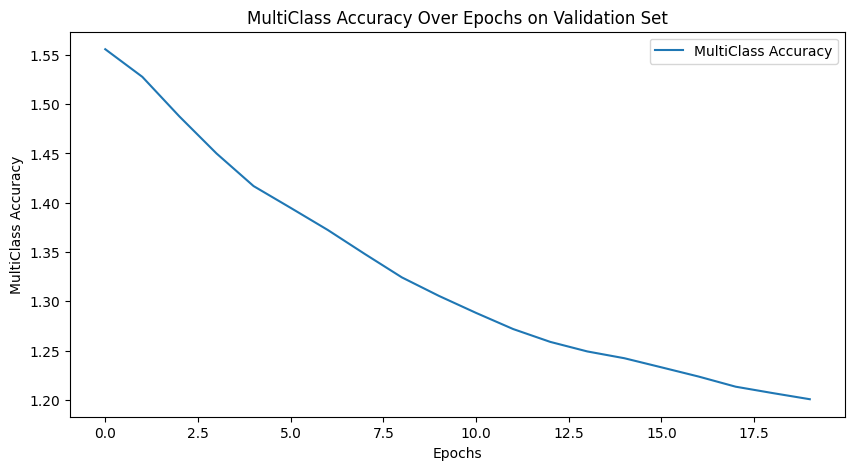

In [ ]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt


# Definir los mejores hiperparámetros obtenidos de la búsqueda en cuadrícula
best_hyperparams = {'depth': 8, 'iterations': 20, 'l2_leaf_reg': 3, 'learning_rate': 0.09}

# Inicializar el modelo CatBoost con los mejores hiperparámetros
best_cb_model = CatBoostClassifier(**best_hyperparams,verbose=False)

# Entrenar el modelo con los datos de entrenamiento
best_cb_model.fit(X4_train, Y4_train, verbose=False)

# Entrenar el modelo con los datos de entrenamiento y evaluar en el conjunto de validación
# Asegúrate de habilitar el registro de la métrica de evaluación
best_cb_model.fit(X4_train, Y4_train, eval_set=(X4_val, Y4_val), verbose=False, plot=False)

# CatBoost permite acceder al registro de métricas de evaluación a través del objeto del modelo
# Acceder a las métricas de evaluación
eval_metrics = best_cb_model.get_evals_result()

# Ajustar el nombre de la clave para acceder a la métrica 'MultiClass' en el conjunto de validación
epochs = range(len(eval_metrics['validation']['MultiClass']))
accuracy = eval_metrics['validation']['MultiClass']

# Crear un gráfico de la métrica a lo largo de las iteraciones de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, label='MultiClass Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MultiClass Accuracy')
plt.title('MultiClass Accuracy Over Epochs on Validation Set')
plt.legend()
plt.show()


In [ ]:
# Asumiendo que 'best_cb_model' es tu modelo entrenado

# Obtener la importancia de las características
feature_importances = best_cb_model.get_feature_importance()

# Obtener los nombres de las características
feature_names = X4_train.columns

# Crear un DataFrame para visualizar mejor la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia de manera descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame
print(importance_df)


           Feature  Importance
9          oldpeak   13.187258
12            thal    9.708211
2               cp    9.648647
15        cp_count    9.027990
0              age    8.531442
4             chol    8.351212
7          thalach    6.852978
6          restecg    6.647340
3         trestbps    6.167515
8            exang    5.322991
13      chol_count    5.062388
14  trestbps_count    4.238990
1              sex    2.828114
11              ca    1.534580
10           slope    1.459280
5              fbs    1.431062


In [ ]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y4_val_pred = best_cb_model.predict(X4_val)

# Calcular la precisión
accuracy = accuracy_score(Y4_val, Y4_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.5


In [ ]:
# Excluyendo la columna 'label'
test_end4_sin_label = test_end4.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = best_cb_model.predict(test_end4_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = best_cb_model.predict_proba(test_end4_sin_label)



In [ ]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df4 = test_end4.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df4['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df4.head())



          age  sex   cp  trestbps  chol  fbs  restecg   thalach  exang  \
732  0.591837  1.0  4.0         3     1  0.0      2.0  0.415493    1.0   
733  0.489796  1.0  2.0         3     1  0.0      0.0  0.739437    0.0   
734  0.408163  1.0  2.0         1     0  0.0      0.0  0.281690    0.0   
735  0.693878  1.0  4.0         1     0  0.0      0.0  0.478873    1.0   
736  0.469388  1.0  3.0         1     1  0.0      0.0  0.443662    0.0   

      oldpeak  slope   ca  thal  label  chol_count  trestbps_count  cp_count  
732  0.636364    2.0  0.0   0.0    2.0         128             485       495  
733  0.295455    1.0  0.0   0.0    0.0         128             485       173  
734  0.295455    1.0  0.0   0.0    0.0         201             161       173  
735  0.579545    2.0  0.0   0.0    1.0         201             161       495  
736  0.363636    0.0  0.0   1.0    0.0         128             161       204  


In [ ]:
predicted_df4['label'].value_counts()

label
0.0    105
1.0     45
2.0     20
3.0     14
Name: count, dtype: int64

In [ ]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df4.reset_index(drop=True, inplace=True)
predicted_df4['ID'] = predicted_df4.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df4[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try61_data.csv', index=False)


## 66 TRY - CATBOOST

In [130]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib as plt
import shap

In [131]:
df4 = pd.read_csv('../df_cleaned.csv')

In [132]:
df4.drop(columns='Unnamed: 0',inplace=True)

In [133]:
df4.drop('index', axis=1, inplace=True)

In [134]:
df4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [135]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df4.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['age', 'oldpeak', 'thalach']
categorical_cols4 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'label']

# Imputación para variables numéricas (usando la media)
numeric_imputer3 = SimpleImputer(strategy='mean')
df4[numeric_cols4] = numeric_imputer3.fit_transform(df4[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df4[categorical_cols4] = categorical_imputer3.fit_transform(df4[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df4.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal        483
label         0
dtype: int64


In [136]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df4['chol'] = df4['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df4['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [137]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df4['trestbps'] = df4['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df4['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [138]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df4['thal'] = df4['thal'].apply(sust_thal)
print(df4['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [139]:
df4.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64

In [140]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler3 = MinMaxScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age', 'oldpeak', 'thalach']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df4[columns_to_scale3] = scaler3.fit_transform(df4[columns_to_scale3])


In [141]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["slope", "ca", "thal", "restecg"]

# Aplicar codificación ordinal
df4[ordinal_vars] = ordinal_encoder.fit_transform(df4[ordinal_vars])

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0.469388,1.0,1.0,2,2,0.0,2.0,0.457746,1.0,0.454545,0.0,1.0,1.0,0.0
1,0.530612,1.0,3.0,2,2,0.0,0.0,0.633803,1.0,0.465909,1.0,0.0,3.0,2.0
2,0.714286,1.0,4.0,3,0,0.0,2.0,0.626761,0.0,0.522727,0.0,0.0,0.0,2.0
3,0.489796,0.0,2.0,3,0,0.0,0.0,0.563380,0.0,0.295455,1.0,0.0,0.0,0.0
4,0.551020,1.0,4.0,3,2,0.0,0.0,0.359155,1.0,0.931818,2.0,0.0,3.0,3.0


In [ ]:
# Aplicar codificación de conteo
for var in ["chol","trestbps", "cp"]:
    df4[var + '_count'] = df4[var].map(df4[var].value_counts())

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,chol_count,trestbps_count,cp_count
0,0.469388,1.0,1.0,2,2,0.0,2.0,0.457746,1.0,0.454545,0.0,1.0,1.0,0.0,230,211,44
1,0.530612,1.0,3.0,2,2,0.0,0.0,0.633803,1.0,0.465909,1.0,0.0,3.0,2.0,230,211,204
2,0.714286,1.0,4.0,3,0,0.0,2.0,0.626761,0.0,0.522727,0.0,0.0,0.0,2.0,201,485,495
3,0.489796,0.0,2.0,3,0,0.0,0.0,0.563380,0.0,0.295455,1.0,0.0,0.0,0.0,201,485,173
4,0.551020,1.0,4.0,3,2,0.0,0.0,0.359155,1.0,0.931818,2.0,0.0,3.0,3.0,230,485,495


In [ ]:
df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,chol_count,trestbps_count,cp_count
0,0.469388,1.0,1.0,2,2,0.0,2.0,0.457746,1.0,0.454545,0.0,1.0,1.0,0.0,230,211,44
1,0.530612,1.0,3.0,2,2,0.0,0.0,0.633803,1.0,0.465909,1.0,0.0,3.0,2.0,230,211,204
2,0.714286,1.0,4.0,3,0,0.0,2.0,0.626761,0.0,0.522727,0.0,0.0,0.0,2.0,201,485,495
3,0.489796,0.0,2.0,3,0,0.0,0.0,0.563380,0.0,0.295455,1.0,0.0,0.0,0.0,201,485,173
4,0.551020,1.0,4.0,3,2,0.0,0.0,0.359155,1.0,0.931818,2.0,0.0,3.0,3.0,230,485,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.530612,1.0,4.0,3,1,0.0,0.0,0.577465,1.0,0.522727,1.0,0.0,0.0,0.0,128,485,495
912,0.551020,1.0,2.0,1,2,1.0,1.0,0.845070,0.0,0.394986,1.0,0.0,0.0,0.0,230,161,173
913,0.795918,1.0,3.0,3,2,0.0,2.0,0.633803,0.0,0.386364,1.0,0.0,3.0,0.0,230,485,204
914,0.632653,1.0,1.0,3,3,0.0,2.0,0.697183,0.0,0.318182,1.0,0.0,3.0,0.0,357,485,44


In [ ]:
train_end4 = df4[0:732]
test_end4 = df4[(916-184):]

In [ ]:
train_end4.isna().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
label             0
chol_count        0
trestbps_count    0
cp_count          0
dtype: int64

In [ ]:
test_end4.isna().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
label             0
chol_count        0
trestbps_count    0
cp_count          0
dtype: int64

In [ ]:
train_end4['label'].value_counts()

label
0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X4 = train_end4.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y4 = train_end4['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X4_train, X4_val, Y4_train, Y4_val = train_test_split(X4, Y4, test_size=0.125, random_state=42)



In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define los hiperparámetros que deseas ajustar
param_grid = {
    'depth': [8, 9, 10, 12],
    'learning_rate': [0.08, 0.09, 0.1],
    'iterations': [18, 20, 22],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Inicializa el modelo CatBoost
cb_model = CatBoostClassifier(verbose=False, loss_function='MultiClass')

# Inicializa GridSearchCV
grid_search = GridSearchCV(estimator=cb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Ajusta GridSearchCV en los datos de entrenamiento
grid_search.fit(X4_train, Y4_train)

# Obtén los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrena un nuevo modelo con los mejores hiperparámetros
best_cb_model = CatBoostClassifier(**best_params)
best_cb_model.fit(X4_train, Y4_train)

# Evalúa el modelo
predictions = best_cb_model.predict(X4_val)
accuracy = accuracy_score(Y4_val, predictions)
print(f"La precisión del modelo CatBoost en el conjunto de validación con los mejores hiperparámetros es: {accuracy}")


Mejores hiperparámetros: {'depth': 8, 'iterations': 20, 'l2_leaf_reg': 3, 'learning_rate': 0.09}
0:	learn: 1.5519686	total: 8.48ms	remaining: 161ms
1:	learn: 1.5140095	total: 14ms	remaining: 126ms
2:	learn: 1.4676368	total: 19.8ms	remaining: 112ms
3:	learn: 1.4216857	total: 23.6ms	remaining: 94.4ms
4:	learn: 1.3777040	total: 27.8ms	remaining: 83.3ms
5:	learn: 1.3461519	total: 31.6ms	remaining: 73.6ms
6:	learn: 1.3146595	total: 36.6ms	remaining: 67.9ms
7:	learn: 1.2845894	total: 40.5ms	remaining: 60.8ms
8:	learn: 1.2529082	total: 46.8ms	remaining: 57.2ms
9:	learn: 1.2268411	total: 51.2ms	remaining: 51.2ms
10:	learn: 1.2020574	total: 54.8ms	remaining: 44.8ms
11:	learn: 1.1788633	total: 59.1ms	remaining: 39.4ms
12:	learn: 1.1606228	total: 62.9ms	remaining: 33.9ms
13:	learn: 1.1429473	total: 67.3ms	remaining: 28.9ms
14:	learn: 1.1253363	total: 71ms	remaining: 23.7ms
15:	learn: 1.1072619	total: 75.2ms	remaining: 18.8ms
16:	learn: 1.0918710	total: 79.1ms	remaining: 14ms
17:	learn: 1.0806542	

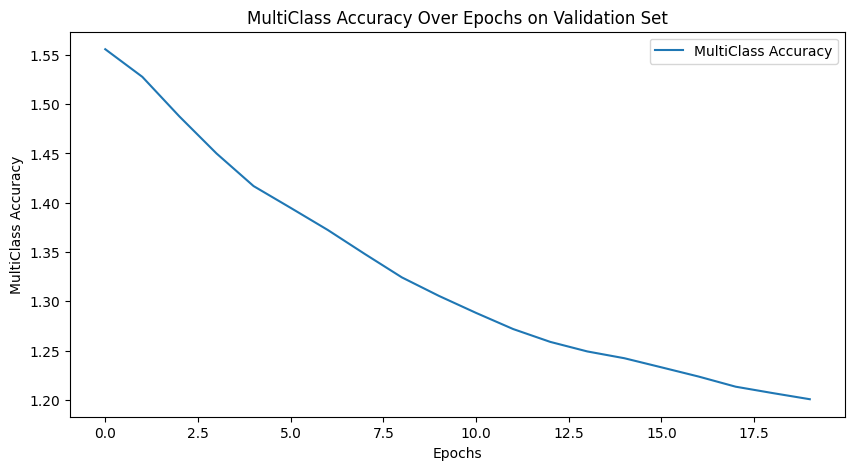

In [ ]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt


# Definir los mejores hiperparámetros obtenidos de la búsqueda en cuadrícula
best_hyperparams = {'depth': 8, 'iterations': 20, 'l2_leaf_reg': 3, 'learning_rate': 0.09}

# Inicializar el modelo CatBoost con los mejores hiperparámetros
best_cb_model = CatBoostClassifier(**best_hyperparams,verbose=False)

# Entrenar el modelo con los datos de entrenamiento
best_cb_model.fit(X4_train, Y4_train, verbose=False)

# Entrenar el modelo con los datos de entrenamiento y evaluar en el conjunto de validación
# Asegúrate de habilitar el registro de la métrica de evaluación
best_cb_model.fit(X4_train, Y4_train, eval_set=(X4_val, Y4_val), verbose=False, plot=False)

# CatBoost permite acceder al registro de métricas de evaluación a través del objeto del modelo
# Acceder a las métricas de evaluación
eval_metrics = best_cb_model.get_evals_result()

# Ajustar el nombre de la clave para acceder a la métrica 'MultiClass' en el conjunto de validación
epochs = range(len(eval_metrics['validation']['MultiClass']))
accuracy = eval_metrics['validation']['MultiClass']

# Crear un gráfico de la métrica a lo largo de las iteraciones de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, label='MultiClass Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MultiClass Accuracy')
plt.title('MultiClass Accuracy Over Epochs on Validation Set')
plt.legend()
plt.show()


In [ ]:
# Asumiendo que 'best_cb_model' es tu modelo entrenado

# Obtener la importancia de las características
feature_importances = best_cb_model.get_feature_importance()

# Obtener los nombres de las características
feature_names = X4_train.columns

# Crear un DataFrame para visualizar mejor la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia de manera descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame
print(importance_df)


           Feature  Importance
9          oldpeak   13.187258
12            thal    9.708211
2               cp    9.648647
15        cp_count    9.027990
0              age    8.531442
4             chol    8.351212
7          thalach    6.852978
6          restecg    6.647340
3         trestbps    6.167515
8            exang    5.322991
13      chol_count    5.062388
14  trestbps_count    4.238990
1              sex    2.828114
11              ca    1.534580
10           slope    1.459280
5              fbs    1.431062


In [ ]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y4_val_pred = best_cb_model.predict(X4_val)

# Calcular la precisión
accuracy = accuracy_score(Y4_val, Y4_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.5


In [ ]:
# Excluyendo la columna 'label'
test_end4_sin_label = test_end4.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = best_cb_model.predict(test_end4_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = best_cb_model.predict_proba(test_end4_sin_label)



In [ ]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df4 = test_end4.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df4['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df4.head())



          age  sex   cp  trestbps  chol  fbs  restecg   thalach  exang  \
732  0.591837  1.0  4.0         3     1  0.0      2.0  0.415493    1.0   
733  0.489796  1.0  2.0         3     1  0.0      0.0  0.739437    0.0   
734  0.408163  1.0  2.0         1     0  0.0      0.0  0.281690    0.0   
735  0.693878  1.0  4.0         1     0  0.0      0.0  0.478873    1.0   
736  0.469388  1.0  3.0         1     1  0.0      0.0  0.443662    0.0   

      oldpeak  slope   ca  thal  label  chol_count  trestbps_count  cp_count  
732  0.636364    2.0  0.0   0.0    2.0         128             485       495  
733  0.295455    1.0  0.0   0.0    0.0         128             485       173  
734  0.295455    1.0  0.0   0.0    0.0         201             161       173  
735  0.579545    2.0  0.0   0.0    1.0         201             161       495  
736  0.363636    0.0  0.0   1.0    0.0         128             161       204  


In [ ]:
predicted_df4['label'].value_counts()

label
0.0    105
1.0     45
2.0     20
3.0     14
Name: count, dtype: int64

In [ ]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df4.reset_index(drop=True, inplace=True)
predicted_df4['ID'] = predicted_df4.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df4[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try66_data.csv', index=False)


## 83 TRY - CATBOOST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib as plt
import shap

In [ ]:
df4 = pd.read_csv('../df_cleaned.csv')

In [ ]:
df4.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df4.drop('index', axis=1, inplace=True)

In [ ]:
df4 = df4.drop(columns=['ca', 'thal'])

In [ ]:
df4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,3.0


In [ ]:
df4.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          89
restecg       2
thalach      55
exang        55
oldpeak      62
slope       308
label       184
dtype: int64

In [ ]:
# Contar los ceros en cada columna
zeros_count = (df4 == 0).sum()

# Contar los números negativos en cada columna
negatives_count = (df4 < 0).sum()

# Mostrar los resultados
print("Cantidad de ceros en cada columna:")
print(zeros_count)

print("\nCantidad de números negativos en cada columna:")
print(negatives_count)


Cantidad de ceros en cada columna:
age           0
sex         194
cp            0
trestbps      1
chol        171
fbs         690
restecg     549
thalach       0
exang       525
oldpeak     369
slope         0
label       327
dtype: int64

Cantidad de números negativos en cada columna:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak     12
slope        0
label        0
dtype: int64


In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df4.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['age', 'thalach']
categorical_cols4 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'label']

# Imputación para variables numéricas (usando la media)
numeric_imputer3 = SimpleImputer(strategy='mean')
df4[numeric_cols4] = numeric_imputer3.fit_transform(df4[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df4[categorical_cols4] = categorical_imputer3.fit_transform(df4[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df4.isnull().sum())


age          0
sex          0
cp           0
trestbps    59
chol        30
fbs          0
restecg      0
thalach      0
exang        0
oldpeak     62
slope        0
label        0
dtype: int64


In [ ]:
# Función para categorizar la depresión del segmento ST inducida por el ejercicio en relación con el descanso ("oldpeak")
def categorizar_oldpeak(valor):
    if valor < 0:
        return 0
    elif 0 <= valor < 1:
        return 1
    elif 1 <= valor < 2:
        return 2
    elif 2 <= valor < 3:
        return 3
    else:   # valor >= 3
        return 4

# Aplicar la función al DataFrame
df4['oldpeak'] = df4['oldpeak'].apply(categorizar_oldpeak)

# Mostrar los primeros registros para verificar el resultado
print(df4['oldpeak'].head())


0    2
1    2
2    3
3    1
4    4
Name: oldpeak, dtype: int64


In [ ]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor < 240:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df4['chol'] = df4['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df4['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [ ]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df4['trestbps'] = df4['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df4['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [ ]:
df4.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
label       0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler3 = MinMaxScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age', 'thalach']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df4[columns_to_scale3] = scaler3.fit_transform(df4[columns_to_scale3])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["slope", "restecg"]

# Aplicar codificación ordinal
df4[ordinal_vars] = ordinal_encoder.fit_transform(df4[ordinal_vars])

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label
0,0.469388,1.0,1.0,2,2,0.0,2.0,0.457746,1.0,2,0.0,0.0
1,0.530612,1.0,3.0,2,2,0.0,0.0,0.633803,1.0,2,1.0,2.0
2,0.714286,1.0,4.0,3,0,0.0,2.0,0.626761,0.0,3,0.0,2.0
3,0.489796,0.0,2.0,3,0,0.0,0.0,0.563380,0.0,1,1.0,0.0
4,0.551020,1.0,4.0,3,2,0.0,0.0,0.359155,1.0,4,2.0,3.0


In [ ]:
# Aplicar codificación de conteo
for var in ["chol", "trestbps", "cp", "oldpeak"]:
    df4[var + '_count'] = df4[var].map(df4[var].value_counts())

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label,chol_count,trestbps_count,cp_count,oldpeak_count
0,0.469388,1.0,1.0,2,2,0.0,2.0,0.457746,1.0,2,0.0,0.0,230,211,44,205
1,0.530612,1.0,3.0,2,2,0.0,0.0,0.633803,1.0,2,1.0,2.0,230,211,204,205
2,0.714286,1.0,4.0,3,0,0.0,2.0,0.626761,0.0,3,0.0,2.0,201,485,495,119
3,0.489796,0.0,2.0,3,0,0.0,0.0,0.563380,0.0,1,1.0,0.0,201,485,173,463
4,0.551020,1.0,4.0,3,2,0.0,0.0,0.359155,1.0,4,2.0,3.0,230,485,495,117


In [ ]:
train_end4 = df4[0:732]
test_end4 = df4[(916-184):]

In [ ]:
train_end4.isna().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
label             0
chol_count        0
trestbps_count    0
cp_count          0
oldpeak_count     0
dtype: int64

In [ ]:
test_end4.isna().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
label             0
chol_count        0
trestbps_count    0
cp_count          0
oldpeak_count     0
dtype: int64

In [ ]:
train_end4['label'].value_counts()

label
0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X4 = train_end4.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y4 = train_end4['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X4_train, X4_val, Y4_train, Y4_val = train_test_split(X4, Y4, test_size=0.125, random_state=42)



In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define los hiperparámetros que deseas ajustar
param_grid = {
    'depth': [8, 9, 10, 12],
    'learning_rate': [0.08, 0.09, 0.1],
    'iterations': [18, 20, 22],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Inicializa el modelo CatBoost
cb_model = CatBoostClassifier(verbose=False, loss_function='MultiClass')

# Inicializa GridSearchCV
grid_search = GridSearchCV(estimator=cb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Ajusta GridSearchCV en los datos de entrenamiento
grid_search.fit(X4_train, Y4_train)

# Obtén los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrena un nuevo modelo con los mejores hiperparámetros
best_cb_model = CatBoostClassifier(**best_params)
best_cb_model.fit(X4_train, Y4_train)

# Evalúa el modelo
predictions = best_cb_model.predict(X4_val)
accuracy = accuracy_score(Y4_val, predictions)
print(f"La precisión del modelo CatBoost en el conjunto de validación con los mejores hiperparámetros es: {accuracy}")


Mejores hiperparámetros: {'depth': 8, 'iterations': 18, 'l2_leaf_reg': 5, 'learning_rate': 0.09}
0:	learn: 1.5664850	total: 4.25ms	remaining: 72.4ms
1:	learn: 1.5085519	total: 5.21ms	remaining: 41.7ms
2:	learn: 1.4703164	total: 8.51ms	remaining: 42.6ms
3:	learn: 1.4347744	total: 12.9ms	remaining: 45.3ms
4:	learn: 1.4028204	total: 15.4ms	remaining: 40ms
5:	learn: 1.3769787	total: 19.4ms	remaining: 38.7ms
6:	learn: 1.3397012	total: 20.6ms	remaining: 32.4ms
7:	learn: 1.3115269	total: 24.4ms	remaining: 30.5ms
8:	learn: 1.2910461	total: 28ms	remaining: 28ms
9:	learn: 1.2740034	total: 31.9ms	remaining: 25.5ms
10:	learn: 1.2587325	total: 35.8ms	remaining: 22.8ms
11:	learn: 1.2368648	total: 37.6ms	remaining: 18.8ms
12:	learn: 1.2216366	total: 41.5ms	remaining: 16ms
13:	learn: 1.2055552	total: 45.5ms	remaining: 13ms
14:	learn: 1.1916736	total: 49.7ms	remaining: 9.95ms
15:	learn: 1.1759648	total: 54.1ms	remaining: 6.76ms
16:	learn: 1.1628595	total: 57.6ms	remaining: 3.39ms
17:	learn: 1.1493303	t

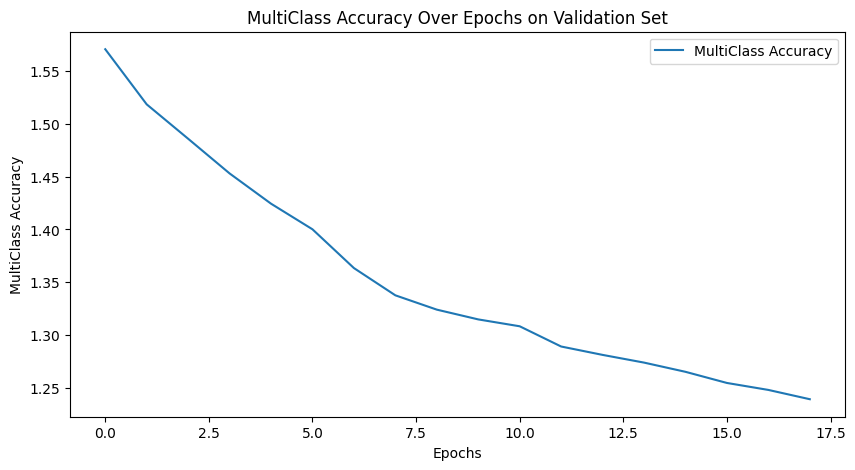

In [ ]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt


# Definir los mejores hiperparámetros obtenidos de la búsqueda en cuadrícula
best_hyperparams = {'depth': 8, 'iterations': 18, 'l2_leaf_reg': 5, 'learning_rate': 0.09}

# Inicializar el modelo CatBoost con los mejores hiperparámetros
best_cb_model = CatBoostClassifier(**best_hyperparams,verbose=False)

# Entrenar el modelo con los datos de entrenamiento
best_cb_model.fit(X4_train, Y4_train, verbose=False)

# Entrenar el modelo con los datos de entrenamiento y evaluar en el conjunto de validación
# Asegúrate de habilitar el registro de la métrica de evaluación
best_cb_model.fit(X4_train, Y4_train, eval_set=(X4_val, Y4_val), verbose=False, plot=False)

# CatBoost permite acceder al registro de métricas de evaluación a través del objeto del modelo
# Acceder a las métricas de evaluación
eval_metrics = best_cb_model.get_evals_result()

# Ajustar el nombre de la clave para acceder a la métrica 'MultiClass' en el conjunto de validación
epochs = range(len(eval_metrics['validation']['MultiClass']))
accuracy = eval_metrics['validation']['MultiClass']

# Crear un gráfico de la métrica a lo largo de las iteraciones de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, label='MultiClass Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MultiClass Accuracy')
plt.title('MultiClass Accuracy Over Epochs on Validation Set')
plt.legend()
plt.show()


In [ ]:
# Asumiendo que 'best_cb_model' es tu modelo entrenado

# Obtener la importancia de las características
feature_importances = best_cb_model.get_feature_importance()

# Obtener los nombres de las características
feature_names = X4_train.columns

# Crear un DataFrame para visualizar mejor la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia de manera descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame
print(importance_df)


           Feature  Importance
2               cp   19.285589
8            exang   10.313155
9          oldpeak   10.008490
13        cp_count    9.181188
14   oldpeak_count    8.270800
0              age    6.538120
6          restecg    6.062908
4             chol    5.858430
7          thalach    5.843963
11      chol_count    5.053000
3         trestbps    4.828603
10           slope    2.852238
12  trestbps_count    2.452307
1              sex    1.856875
5              fbs    1.594332


In [ ]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y4_val_pred = best_cb_model.predict(X4_val)

# Calcular la precisión
accuracy = accuracy_score(Y4_val, Y4_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.5434782608695652


In [ ]:
# Excluyendo la columna 'label'
test_end4_sin_label = test_end4.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = best_cb_model.predict(test_end4_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = best_cb_model.predict_proba(test_end4_sin_label)



In [ ]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df4 = test_end4.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df4['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df4.head())



          age  sex   cp  trestbps  chol  fbs  restecg   thalach  exang  \
732  0.591837  1.0  4.0         3     1  0.0      2.0  0.415493    1.0   
733  0.489796  1.0  2.0         3     1  0.0      0.0  0.739437    0.0   
734  0.408163  1.0  2.0         1     0  0.0      0.0  0.281690    0.0   
735  0.693878  1.0  4.0         1     0  0.0      0.0  0.478873    1.0   
736  0.469388  1.0  3.0         1     1  0.0      0.0  0.443662    0.0   

     oldpeak  slope  label  chol_count  trestbps_count  cp_count  \
732        4    2.0    2.0         128             485       495   
733        1    1.0    0.0         128             485       173   
734        1    1.0    0.0         201             161       173   
735        3    2.0    1.0         201             161       495   
736        1    0.0    0.0         128             161       204   

     oldpeak_count  
732            117  
733            463  
734            463  
735            119  
736            463  


In [ ]:
predicted_df4['label'].value_counts()

label
0.0    104
1.0     33
2.0     31
3.0     16
Name: count, dtype: int64

In [ ]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df4.reset_index(drop=True, inplace=True)
predicted_df4['ID'] = predicted_df4.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df4[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try83_data.csv', index=False)
